### Rachana Amgai
### Milestone 5
### 2/24/2025

In [25]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Step 1: Load cleaned datasets
print("Loading datasets...")
try:
    df_books = pd.read_csv("cleaned_book_data.csv")
    df_outliers = pd.read_csv("outliers_book_data.csv")
    df_duplicates = pd.read_csv("duplicate_book_data.csv")
    print("Datasets loaded successfully!")
except Exception as e:
    print("Error loading datasets:", e)
    exit()

Loading datasets...
Datasets loaded successfully!


In [29]:
# Step 2: Connect to SQLite database
print("Connecting to SQLite database...")
conn = sqlite3.connect("books_database.db")
cursor = conn.cursor()
print("Database connected!")

Connecting to SQLite database...
Database connected!


In [31]:
# Step 3: Store data in SQL tables
print("Storing datasets in database...")
try:
    df_books.to_sql("books", conn, if_exists="replace", index=False)
    df_outliers.to_sql("outliers", conn, if_exists="replace", index=False)
    df_duplicates.to_sql("duplicates", conn, if_exists="replace", index=False)
    print("Data stored successfully!")
except Exception as e:
    print("Error storing data:", e)
    conn.close()
    exit()


Storing datasets in database...
Data stored successfully!


In [33]:
# Verify tables exist
print("Verifying tables in the database...")
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Existing tables:", tables)

if not tables:
    print("No tables found in database. Exiting...")
    conn.close()
    exit()

Verifying tables in the database...
Existing tables: [('books',), ('outliers',), ('duplicates',)]


In [35]:
# Step 4: Merge datasets using SQL Query
print("Merging datasets...")
query = """
SELECT books.*, outliers.pages AS outlier_pages, duplicates.isbn AS duplicate_isbn 
FROM books
LEFT JOIN outliers ON books.book_title = outliers.book_title
LEFT JOIN duplicates ON books.book_title = duplicates.book_title
"""
try:
    merged_df = pd.read_sql(query, conn)
    print("Datasets merged successfully!")
except Exception as e:
    print("Error merging datasets:", e)
    merged_df = pd.DataFrame()


Merging datasets...
Datasets merged successfully!


In [37]:
# Step 5: Close database connection
conn.close()
print("Database connection closed.")

Database connection closed.


In [39]:
# Ensure merged_df is not empty
if merged_df.empty:
    print("Merged dataset is empty. Exiting...")
    exit()


Generating visualization: Distribution of Pages


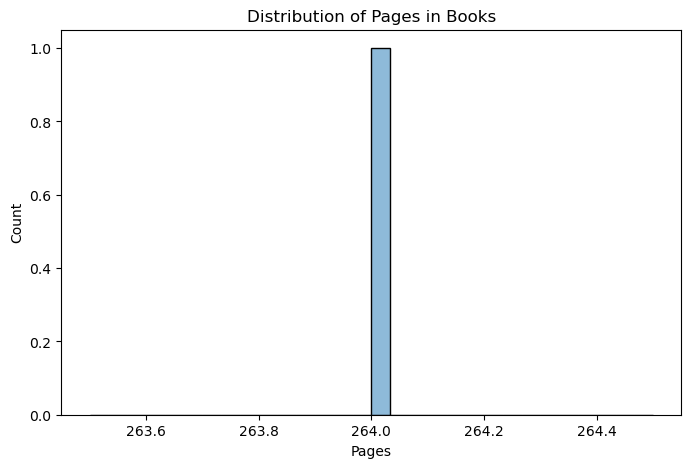

In [41]:
# Step 6: Visualization 1: Distribution of Pages
print("Generating visualization: Distribution of Pages")
plt.figure(figsize=(8, 5))
sns.histplot(merged_df["pages"].dropna(), bins=30, kde=True)
plt.title("Distribution of Pages in Books")
plt.xlabel("Pages")
plt.ylabel("Count")
plt.show()

Generating visualization: Number of Books per Publisher


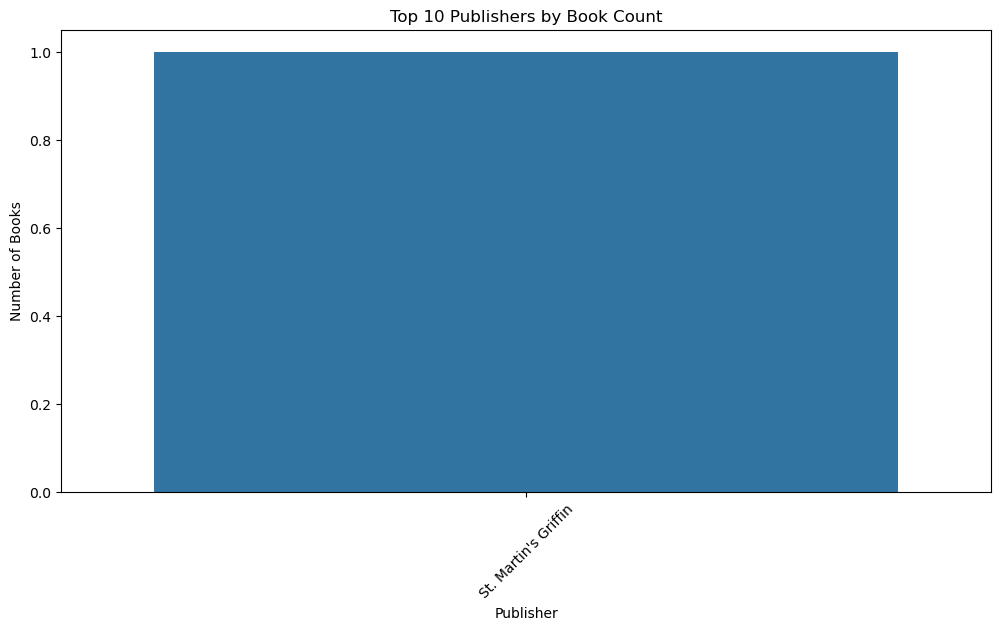

In [43]:
# Step 7: Visualization 2: Number of Books per Publisher
print("Generating visualization: Number of Books per Publisher")
plt.figure(figsize=(12, 6))
top_publishers = merged_df["publisher"].value_counts().nlargest(10)
sns.barplot(x=top_publishers.index, y=top_publishers.values)
plt.xticks(rotation=45)
plt.title("Top 10 Publishers by Book Count")
plt.xlabel("Publisher")
plt.ylabel("Number of Books")
plt.show()

Generating visualization: Outliers in Pages


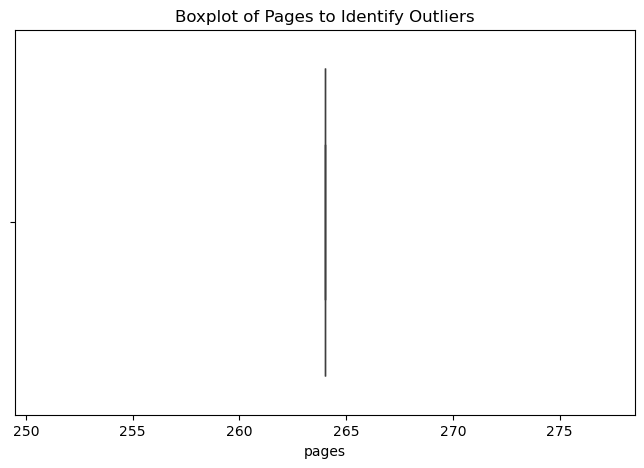

In [45]:
# Step 8: Visualization 3: Outliers in Pages
print("Generating visualization: Outliers in Pages")
plt.figure(figsize=(8, 5))
sns.boxplot(x=merged_df["pages"])
plt.title("Boxplot of Pages to Identify Outliers")
plt.show()

Generating visualization: Book Formats


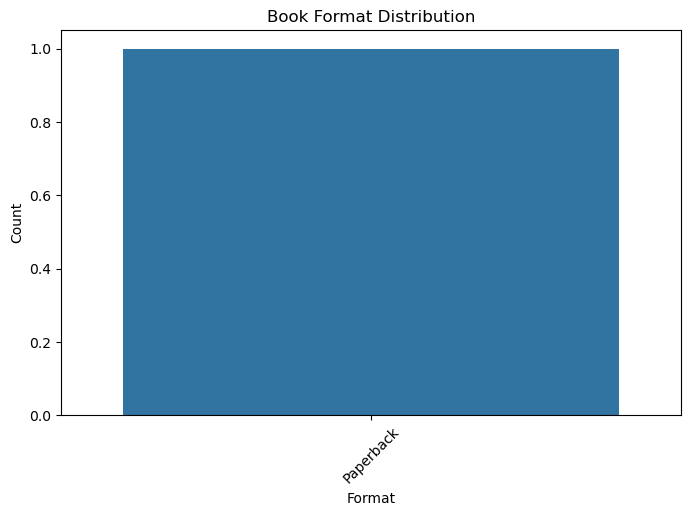

In [47]:
# Step 9: Visualization 4: Book Formats
print("Generating visualization: Book Formats")
plt.figure(figsize=(8, 5))
format_counts = merged_df["format"].value_counts()
sns.barplot(x=format_counts.index, y=format_counts.values)
plt.xticks(rotation=45)
plt.title("Book Format Distribution")
plt.xlabel("Format")
plt.ylabel("Count")
plt.show()

Generating visualization: Yearly Publication Trend


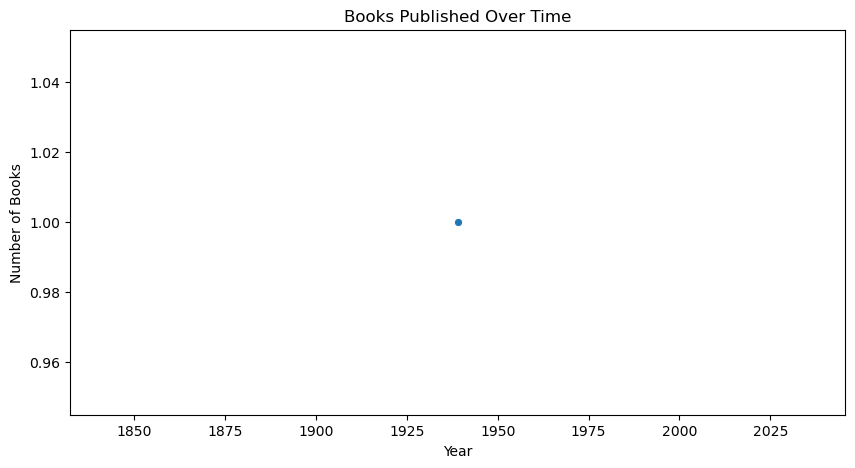

In [49]:
# Step 10: Visualization 5: Yearly Publication Trend
print("Generating visualization: Yearly Publication Trend")
if "first_published" in merged_df.columns:
    merged_df["first_published"] = pd.to_datetime(merged_df["first_published"], errors="coerce")
    yearly_counts = merged_df["first_published"].dt.year.value_counts().sort_index()
    plt.figure(figsize=(10, 5))
    sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o')
    plt.title("Books Published Over Time")
    plt.xlabel("Year")
    plt.ylabel("Number of Books")
    plt.show()

In [51]:
# Step 11: Save merged dataset to CSV
print("Saving merged dataset...")
try:
    merged_df.to_csv("merged_book_data.csv", index=False)
    print("Merged dataset saved as 'merged_book_data.csv'!")
except Exception as e:
    print("Error saving merged dataset:", e)


Saving merged dataset...
Merged dataset saved as 'merged_book_data.csv'!


### Summary And 
### To mitigate these risks:


This project enhanced my understanding of data cleansing, integration, and visualization. Loading datasets into Pandas, manipulating data, and detecting problems such as missing values, duplicates, and outliers enhanced my proficiency in data preparation. In addition, the use of SQLite for structured storage enabled me to comprehend the operation of relational databases and the execution of SQL joins for the merging of different dataset. I acquired the ability to foresee and address problems, hence averting script failures. Resolving issues like absent database tables and erroneous queries provide practical experience in troubleshooting SQL queries and executing Panda’s operations.
Also, the visualization methods with Matplotlib and Seaborn enhanced my comprehension of good data presentation. The construction of histograms, boxplots, and bar charts underscored the importance of visual analytics in narrative presentation. 
I gained skills in data integration. The integration of datasets with disparate architectures highlighted the intricacies of managing misaligned columns, absent values, and maintaining consistency in combined records.
Despite the advancements, I continue to encounter difficulties with SQL queries in Python. While I have effectively performed joins, I require enhancement in optimizing queries for extensive datasets. Advanced join techniques and indexing methodologies for optimal data retrieval continue to be a focus of study. A further problem involves managing disparate data formats. For instance, when converting dates, specific formats were unsuccessful due to inconsistencies in date recording. 
Moreover, although I effectively employed fuzzy matching techniques, I must enhance my strategy for managing near-duplicates. The similarity score threshold may occasionally yield erroneous matches, necessitating more investigation for parameter optimization.
Data transformation presents several ethical issues, such as the introduction of prejudice, misrepresentation, and privacy concerns. Modifying or cleaning data carries the potential of inadvertent bias; for instance, eliminating outliers without adequate rationale may result in erroneous results. Furthermore, the aggregation or normalization of text fields may obscure essential distinctions, resulting in possible misinterpretations. Another ethical danger is to data integrity and misrepresentation. Incorrect transformations, such as merging erroneous records or misleadingly normalizing values, may result in a final dataset which yields false insights.
Privacy concerns emerge when handling datasets that include personally identifiable information (PII). This experiment did not involve sensitive data; but, in a real-world context, integrating datasets without adequate anonymization may reveal confidential information. 


# To mitigate these risks:
1.	Maintain Data Transparency – Document all transformations and cleaning steps to ensure traceability.
2.	Perform Bias Checks – Before finalizing transformations, analyze the impact of modifications on the dataset’s distribution.
3.	Validate Data Accuracy – Use verification steps to cross-check transformed data against original records.
4.	Ensure Ethical Use of Fuzzy Matching – Prevent unintended data merging by setting appropriate similarity thresholds.
